In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating Adapted Users column from takehome_user_engagement data

In [55]:
df2=pd.read_csv("C:\\Users\\Sundar\\Downloads\\takehome_user_engagement.csv")

df2

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [56]:
#converting time_stamp to datetime type
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])

In [57]:
#reseting index and setting time_stamp as inew index
df3 = df2.reset_index().set_index('time_stamp')
df3

,index,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,0,1,1
2013-11-15 03:45:04,1,2,1
2013-11-29 03:45:04,2,2,1
2013-12-09 03:45:04,3,2,1
2013-12-25 03:45:04,4,2,1
...,...,...,...
2013-09-06 06:14:15,207912,11996,1
2013-01-15 18:28:37,207913,11997,1
2014-04-27 12:45:16,207914,11998,1


In [58]:
#grouping by user_id and counting the visitation by rolling 7 day time period
_grouped = df3.groupby(df3["user_id"]).rolling('7D').visited.count().reset_index(name='visited_in_7day')
            #.reset_index(name='visited_in_7day')= this will keed the groupby columns as well as name the new column.

df_7day = pd.DataFrame(_grouped)
#df_7day = df_7day.rename(columns={"visited":"visited_in_7day"})
df_7day


,user_id,time_stamp,visited_in_7day
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0
...,...,...,...
207912,11996,2013-09-06 06:14:15,1.0
207913,11997,2013-01-15 18:28:37,1.0
207914,11998,2014-04-27 12:45:16,1.0
207915,11999,2012-06-02 11:55:59,1.0


In [59]:
#counting the maximum visits of a user in 7 day period
df4=df_7day.groupby("user_id").visited_in_7day.max().reset_index(name='max_visits')
df4

,user_id,max_visits
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
8818,11996,1.0
8819,11997,1.0
8820,11998,1.0
8821,11999,1.0


In [60]:
df4['adapted_user'] = df4['max_visits'].apply(lambda i: 1 if i>=3 else 0)
df4

,user_id,max_visits,adapted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0
...,...,...,...
8818,11996,1.0,0
8819,11997,1.0,0
8820,11998,1.0,0
8821,11999,1.0,0


In [61]:
df4.adapted_user.value_counts()

0    7221
1    1602
Name: adapted_user, dtype: int64

# cleaning of takehome_users data

In [62]:
df1=pd.read_csv(r"C:\Users\Sundar\Downloads\takehome_users.csv",encoding="ISO-8859-1")

df1

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [63]:
#renaming object id as user id inorder to concatenate with the adapted user df.

df1.rename(columns = {'object_id':'user_id'}, inplace = True)
df1.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [64]:
New_DF= df1.merge(df4, on='user_id', how='left') #this is what we want.Just one more col ["adapted_user"] added w.r.t ["user_id"]
New_DF

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,max_visits,adapted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1.0,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1.0,0.0


In [65]:
New_DF.drop(columns=["max_visits"],inplace=True)
New_DF

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adapted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0.0


now we have our New_DF

all we have to do is EDA and find a way to increase adopted users.

"adapted user" as a user who has logged into the product on three separate
days in at least one seven­day period , identify which factors predict future user
adoption


["visited"] is our target column




In [66]:
New_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adapted_user                8823 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [67]:
#filling missing values with 0
New_DF['last_session_creation_time'].fillna(0, inplace = True)
New_DF['invited_by_user_id'].fillna(0, inplace = True)
New_DF['adapted_user'].fillna(0, inplace = True)
New_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  adapted_user                12000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [68]:
'''
we are about to drop "user_id","name","email" and "last_session_creation_time".
"user_id","name","email"  have unique 12000 values, so dropping them.
since the "adapted_user" column has been generated based on 8823-"last_session_creation_time". This can also be dropped.

'''

New_DF.drop(["user_id","name","email", "last_session_creation_time"], axis = 1, inplace = True)
New_DF

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adapted_user
0,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0.0
1,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1.0
2,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0.0
3,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0.0
4,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...
11995,2013-09-06 06:14:15,ORG_INVITE,0,0,89,8263.0,0.0
11996,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,0.0
11997,2014-04-27 12:45:16,GUEST_INVITE,1,1,83,8074.0,0.0
11998,2012-05-31 11:55:59,PERSONAL_PROJECTS,0,0,6,0.0,0.0


In [69]:
df2.time_stamp.max()

Timestamp('2014-06-06 14:58:50')

In [70]:
New_DF.creation_time.max()

'2014-05-30 23:59:19'

In [71]:
#to extract the age of the account from "creation_time", subtract "creation_time" from maximum of time_stamp of df2.
New_DF["creation_time"]=pd.to_datetime(New_DF["creation_time"])
New_DF["account_age_in_days"]=(df2.time_stamp.max()-New_DF.creation_time).dt.days
New_DF

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adapted_user,account_age_in_days
0,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0.0,45
1,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1.0,203
2,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0.0,443
3,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0.0,381
4,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0.0,505
...,...,...,...,...,...,...,...,...
11995,2013-09-06 06:14:15,ORG_INVITE,0,0,89,8263.0,0.0,273
11996,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,0.0,511
11997,2014-04-27 12:45:16,GUEST_INVITE,1,1,83,8074.0,0.0,40
11998,2012-05-31 11:55:59,PERSONAL_PROJECTS,0,0,6,0.0,0.0,736


In [72]:
#dropping "creation_time"
New_DF.drop(["creation_time"], axis = 1, inplace = True)
New_DF

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adapted_user,account_age_in_days
0,GUEST_INVITE,1,0,11,10803.0,0.0,45
1,ORG_INVITE,0,0,1,316.0,1.0,203
2,ORG_INVITE,0,0,94,1525.0,0.0,443
3,GUEST_INVITE,0,0,1,5151.0,0.0,381
4,GUEST_INVITE,0,0,193,5240.0,0.0,505
...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,8263.0,0.0,273
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,0.0,511
11997,GUEST_INVITE,1,1,83,8074.0,0.0,40
11998,PERSONAL_PROJECTS,0,0,6,0.0,0.0,736


In [73]:
#before encoding, we can convert the "invited_by_user_id" to "got_invited", if the user has got invited by other user.
New_DF['got_invited'] = New_DF['invited_by_user_id'].apply(lambda i: 1 if i>0 else 0)
New_DF

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adapted_user,account_age_in_days,got_invited
0,GUEST_INVITE,1,0,11,10803.0,0.0,45,1
1,ORG_INVITE,0,0,1,316.0,1.0,203,1
2,ORG_INVITE,0,0,94,1525.0,0.0,443,1
3,GUEST_INVITE,0,0,1,5151.0,0.0,381,1
4,GUEST_INVITE,0,0,193,5240.0,0.0,505,1
...,...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,8263.0,0.0,273,1
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,0.0,511,0
11997,GUEST_INVITE,1,1,83,8074.0,0.0,40,1
11998,PERSONAL_PROJECTS,0,0,6,0.0,0.0,736,0


In [74]:
#dropping "invited_by_user_id"
New_DF.drop(["invited_by_user_id"], axis = 1, inplace = True)
New_DF

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adapted_user,account_age_in_days,got_invited
0,GUEST_INVITE,1,0,11,0.0,45,1
1,ORG_INVITE,0,0,1,1.0,203,1
2,ORG_INVITE,0,0,94,0.0,443,1
3,GUEST_INVITE,0,0,1,0.0,381,1
4,GUEST_INVITE,0,0,193,0.0,505,1
...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,0.0,273,1
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,511,0
11997,GUEST_INVITE,1,1,83,0.0,40,1
11998,PERSONAL_PROJECTS,0,0,6,0.0,736,0


In [75]:
#encoding "creation_source" columns
New_DF = pd.get_dummies(New_DF, columns=['creation_source'])

New_DF.describe().T



,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.0,108.0,238.25,416.0
adapted_user,12000.0,0.133500,0.340128,0.0,0.0,0.0,0.00,1.0
account_age_in_days,12000.0,324.568000,216.646173,6.0,129.0,304.0,506.00,736.0
got_invited,12000.0,0.534750,0.498812,0.0,0.0,1.0,1.00,1.0
creation_source_GUEST_INVITE,12000.0,0.180250,0.384412,0.0,0.0,0.0,0.00,1.0
creation_source_ORG_INVITE,12000.0,0.354500,0.478381,0.0,0.0,0.0,1.00,1.0
creation_source_PERSONAL_PROJECTS,12000.0,0.175917,0.380765,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP,12000.0,0.173917,0.379054,0.0,0.0,0.0,0.00,1.0


In [76]:
New_DF.dtypes

opted_in_to_mailing_list                int64
enabled_for_marketing_drip              int64
org_id                                  int64
adapted_user                          float64
account_age_in_days                     int64
got_invited                             int64
creation_source_GUEST_INVITE            uint8
creation_source_ORG_INVITE              uint8
creation_source_PERSONAL_PROJECTS       uint8
creation_source_SIGNUP                  uint8
creation_source_SIGNUP_GOOGLE_AUTH      uint8
dtype: object


New_DF is the data to use in ML.
since this is a classification problem, we are about to try Decision Tree algorithm.


In [77]:
New_DF.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'adapted_user', 'account_age_in_days', 'got_invited',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [78]:
#rearranging the columns for easy comparison in sns.pairplot
New_DF=New_DF[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'got_invited','creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'account_age_in_days','adapted_user']]
New_DF

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,got_invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,account_age_in_days,adapted_user
0,1,0,11,1,1,0,0,0,0,45,0.0
1,0,0,1,1,0,1,0,0,0,203,1.0
2,0,0,94,1,0,1,0,0,0,443,0.0
3,0,0,1,1,1,0,0,0,0,381,0.0
4,0,0,193,1,1,0,0,0,0,505,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,89,1,0,1,0,0,0,273,0.0
11996,0,0,200,0,0,0,0,0,1,511,0.0
11997,1,1,83,1,1,0,0,0,0,40,0.0
11998,0,0,6,0,0,0,1,0,0,736,0.0


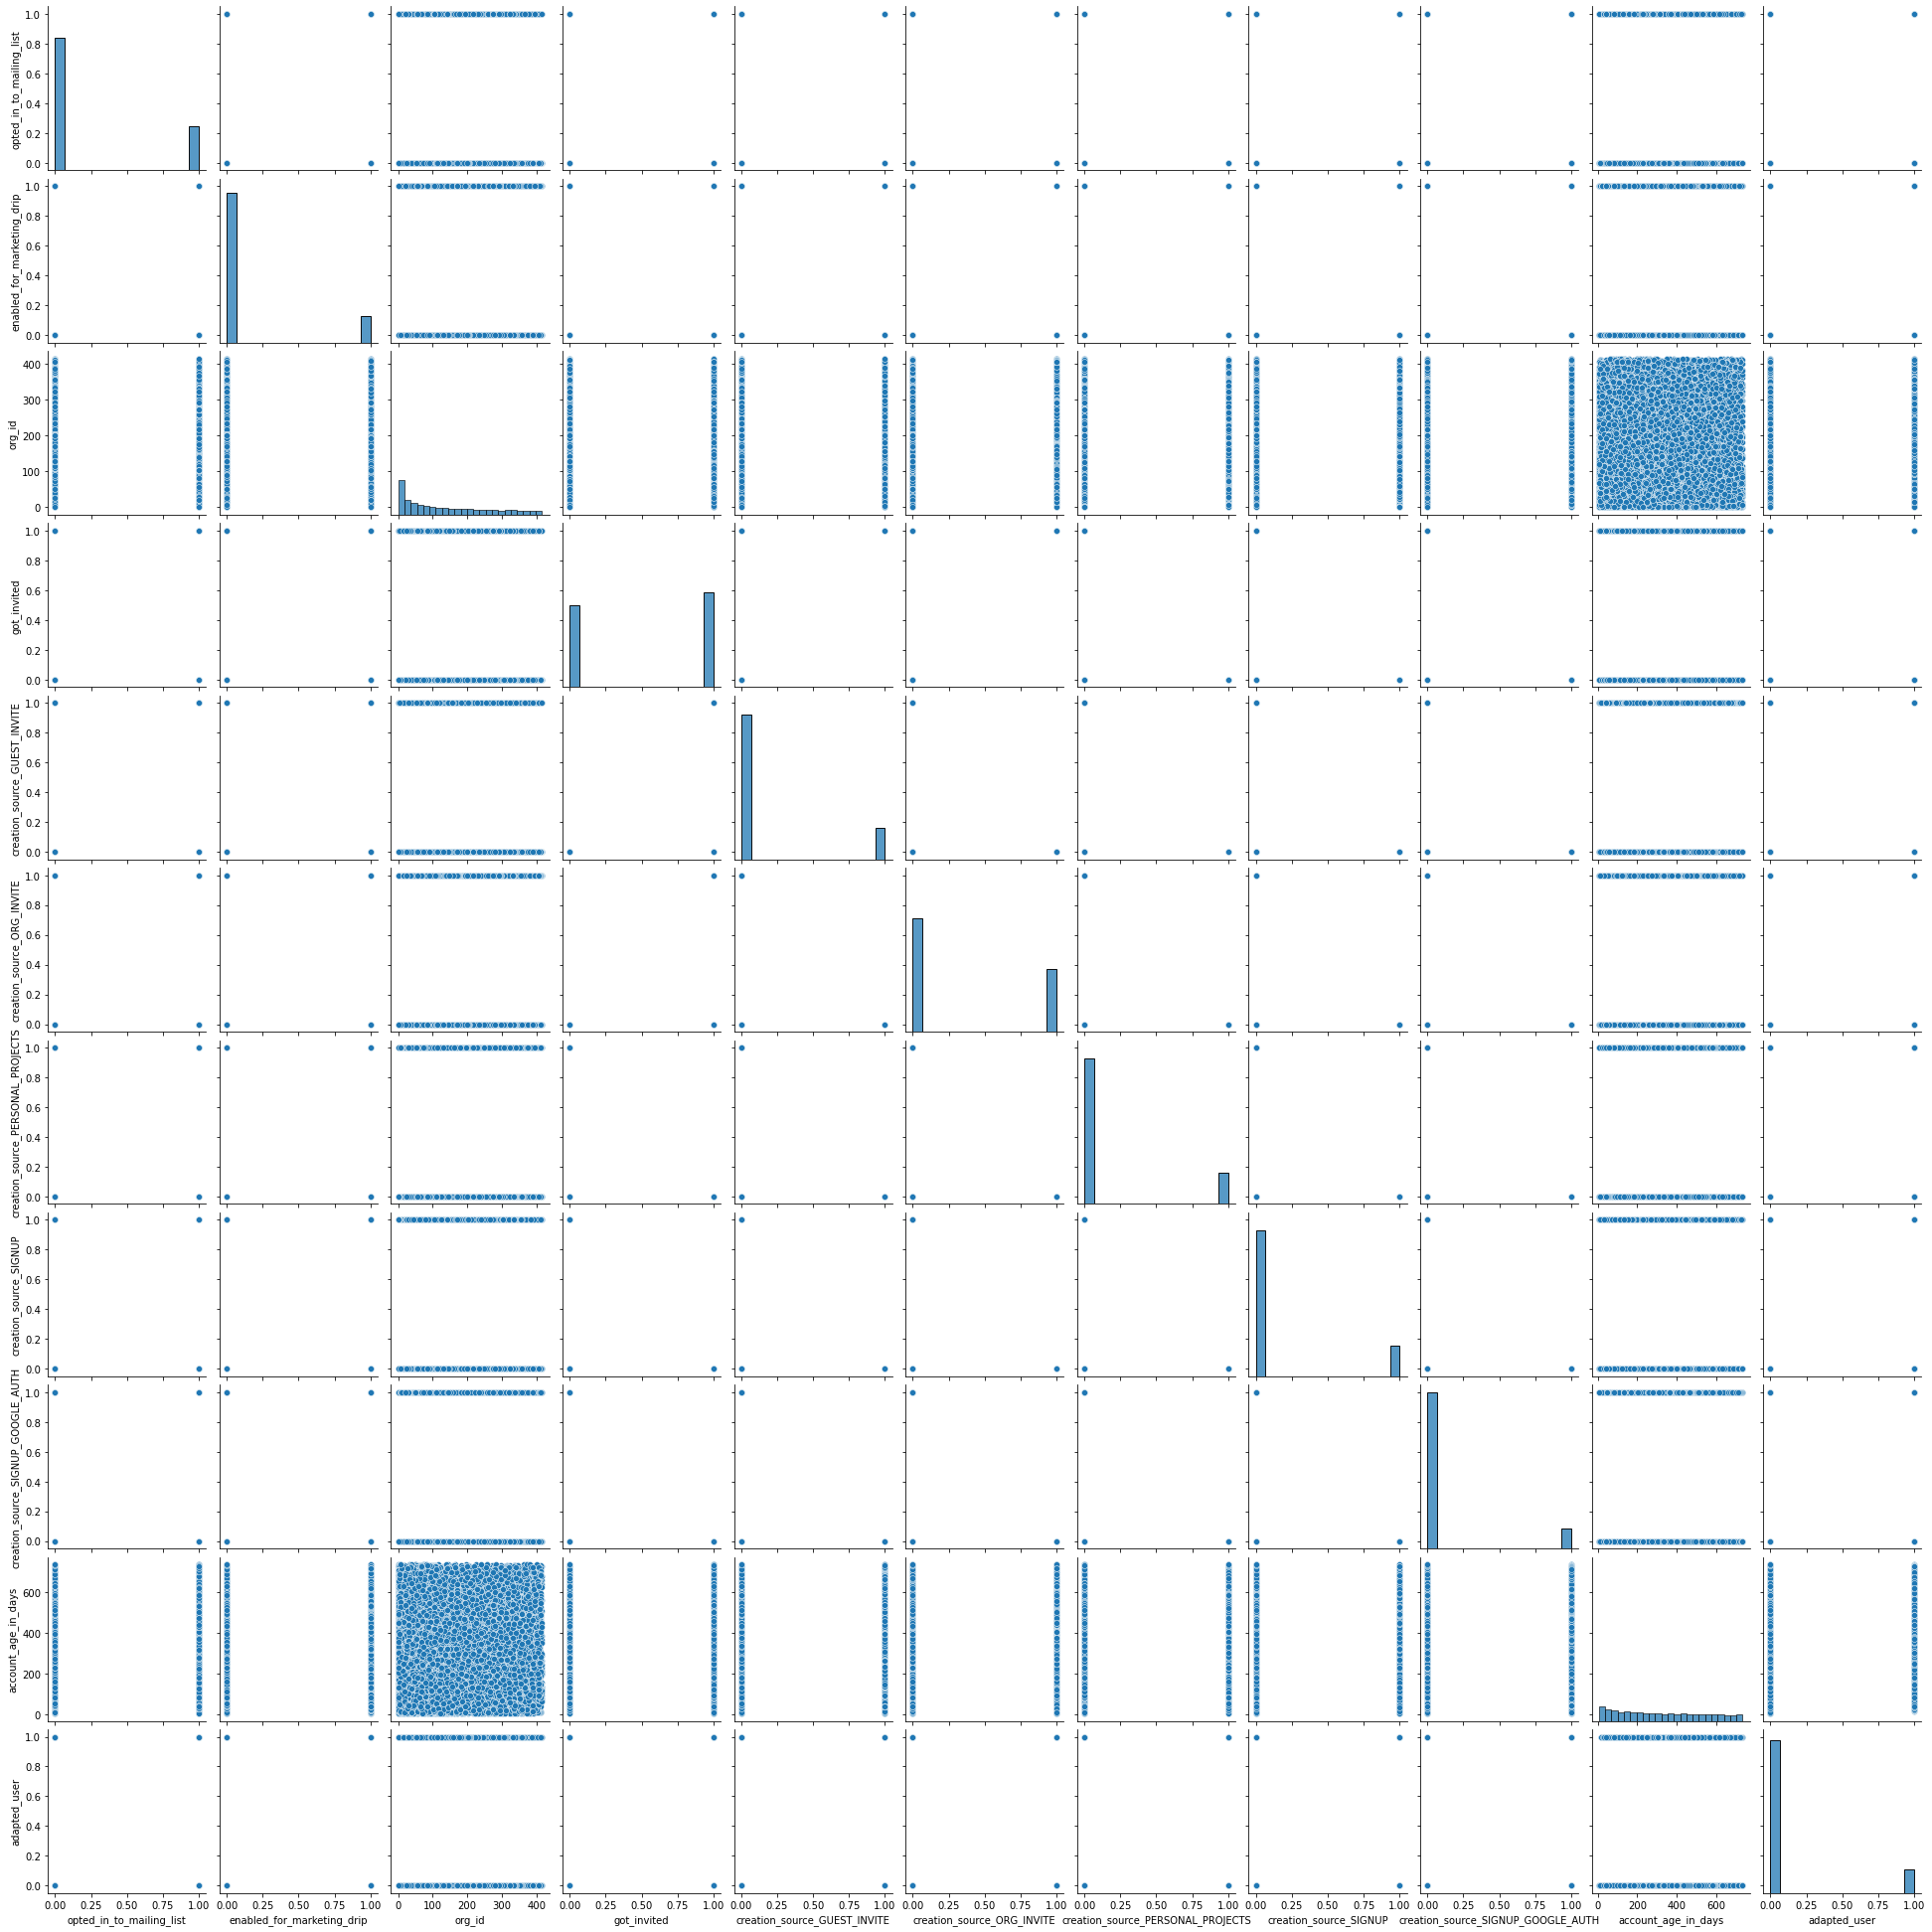

In [80]:
sns.pairplot(New_DF)
#the last row will give target Vs all Features simultaneously

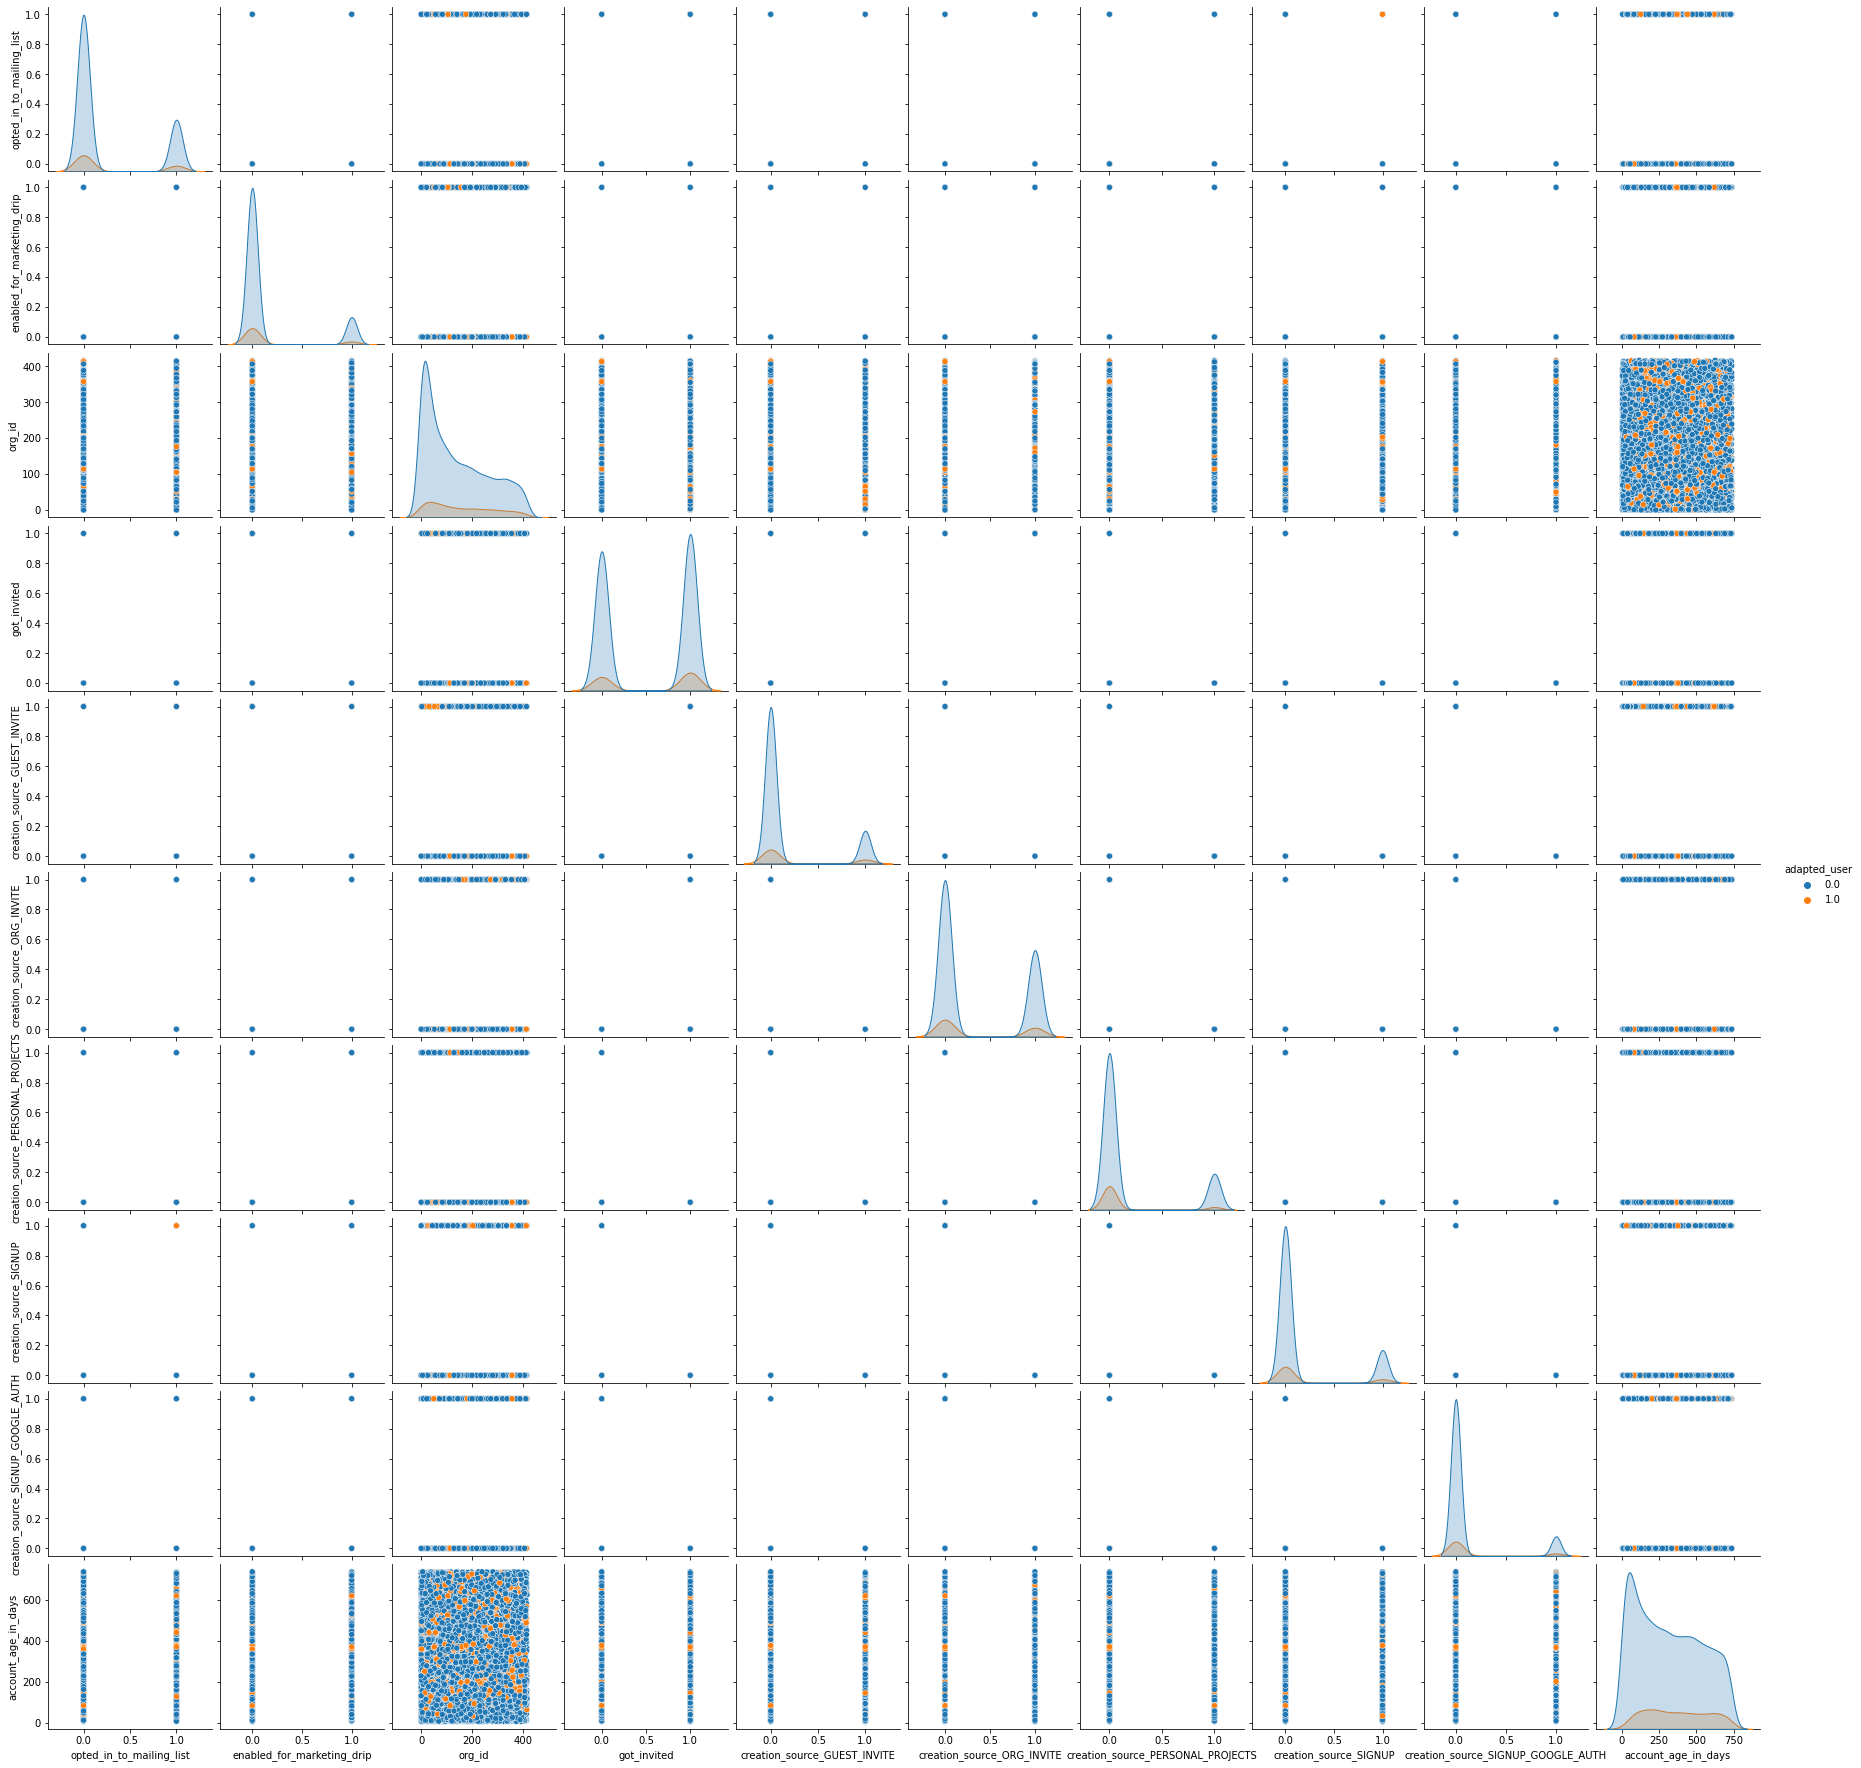

In [82]:
sns.pairplot(New_DF, hue = 'adapted_user')

from the above pair-plot(in hue) it is visible that users who have "opted_in_to_mailing_list"
have adapted highly than compared to those who have not opted.

Also, similar pattern can be observed in "opted_to_marketing drip" and all kinds of
"creation source". 

But, "got_invited" column has no notable effect on user adaption, as the number of adapted users is nearly equal in 
both cases,ie, who have got invited and who have not got invited.

"account_age_in_days" has notable effect in user adoption as well, as older accounts have slightly higher adoption rate 
and newer accounts have comparatively lower adaption rate.A similar pattern can be observed in "org_id"  as well.

Class 0: 10398
Class 1: 1602
Proportion of class 0 is  86.65 %


<AxesSubplot:title={'center':'Count (adapted_user)'}>

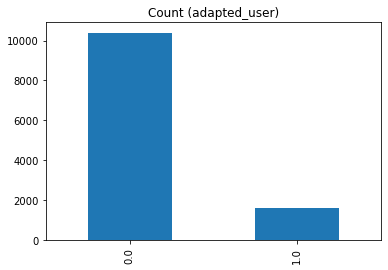

In [83]:
adapted_user_count = New_DF.adapted_user.value_counts()
print('Class 0:', adapted_user_count[0])
print('Class 1:', adapted_user_count[1])
print('Proportion of class 0 is ', round(adapted_user_count[0] * 100 / (adapted_user_count[1] + adapted_user_count[0]), 2),'%')

adapted_user_count.plot(kind='bar', title='Count (adapted_user)')

As we can see, this is an imbalanced data set.

In [63]:
!pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [28]:
import imblearn

In [84]:
# fixing target and variables in y and X

X=New_DF[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'got_invited','creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'account_age_in_days']]
y=New_DF["adapted_user"]

In [85]:
#data splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,stratify=y)

In [86]:
#balancing data using SMOTE oversampling and undersampling simultaneously on training data set

from imblearn.combine import SMOTEENN #import
smt = SMOTEENN(sampling_strategy='all')#initialise
X_smt, y_smt = smt.fit_resample(X_train, y_train)#fit training data


In [87]:
#modelling Decision Tree algo

from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred
#print(y_pred[0:5])

array([0., 0., 0., ..., 0., 1., 0.])

In [88]:
#Evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))



acc = roc_auc_score(y_train, dt.predict(X_train))
print("Train set AUC : ", acc)

Test set accuracy: 0.77
Test set auc: 0.53
Train set AUC :  0.9980499219968799


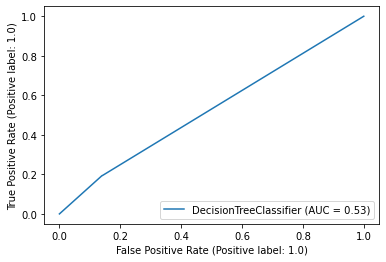

In [89]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, X_test, y_test)

plt.show()

This is an overfit model, as Train set auc is higher(0.99) and test set auc score is ~0.5. 
so we have to reduce over fitting.

In [37]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in range(1,21,1):
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))



Depth  :  1  Training Accuracy :  0.8664583333333333  Cross val score :  0.8664583333333334
Depth  :  2  Training Accuracy :  0.8665625  Cross val score :  0.8664583333333334
Depth  :  3  Training Accuracy :  0.8665625  Cross val score :  0.8664583333333334
Depth  :  4  Training Accuracy :  0.8665625  Cross val score :  0.86625
Depth  :  5  Training Accuracy :  0.866875  Cross val score :  0.8655208333333333
Depth  :  6  Training Accuracy :  0.8678125  Cross val score :  0.8642708333333333
Depth  :  7  Training Accuracy :  0.8683333333333333  Cross val score :  0.8625
Depth  :  8  Training Accuracy :  0.8704166666666666  Cross val score :  0.8594791666666666
Depth  :  9  Training Accuracy :  0.8729166666666667  Cross val score :  0.8544791666666667
Depth  :  10  Training Accuracy :  0.87625  Cross val score :  0.8480208333333333
Depth  :  11  Training Accuracy :  0.8836458333333334  Cross val score :  0.8430208333333333
Depth  :  12  Training Accuracy :  0.8907291666666667  Cross val s

best hyperparameter value(max_depth= 3) as it has higher cross val score 
Depth  :  3  Training Accuracy :  0.8665625  Cross val score :  0.8664583333333334

In [38]:
#modelling Decision Tree algo

from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier(max_depth= 3)

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred
#print(y_pred[0:5])

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      2080
         1.0       0.00      0.00      0.00       320

    accuracy                           0.87      2400
   macro avg       0.43      0.50      0.46      2400
weighted avg       0.75      0.87      0.80      2400



In [47]:
#Evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc y_test/y_pred: {:.2f}".format(acc))


Test set accuracy: 0.87
Test set auc y_test/y_pred: 0.50


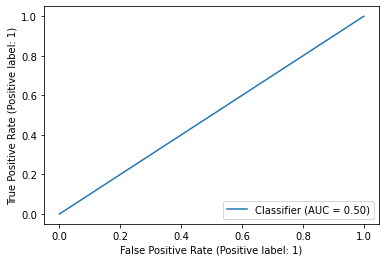

In [46]:
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

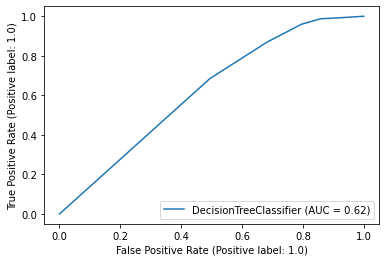

In [40]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, X_test, y_test)

plt.show()

In [ ]:
DT shows a descent Baseline score

In [90]:
#Feature Importances

importance = dt.feature_importances_
df = pd.DataFrame({'Feature': X_test.columns, 'Importance': importance})
df

,Feature,Importance
0,opted_in_to_mailing_list,0.037761
1,enabled_for_marketing_drip,0.022986
2,org_id,0.386965
3,got_invited,0.010624
4,creation_source_GUEST_INVITE,0.012361
5,creation_source_ORG_INVITE,0.016693
6,creation_source_PERSONAL_PROJECTS,0.007069
7,creation_source_SIGNUP,0.015458
8,creation_source_SIGNUP_GOOGLE_AUTH,0.014440
9,account_age_in_days,0.475643


In [91]:
df.drop(df[(df['Importance'] <0.1)].index, inplace=True)

df

,Feature,Importance
2,org_id,0.386965
9,account_age_in_days,0.475643


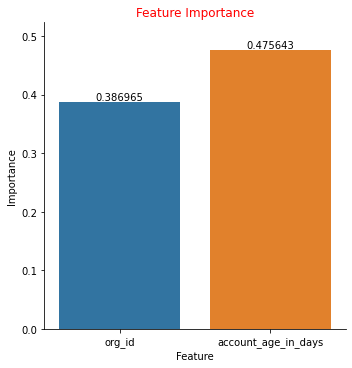

In [93]:
fig=sns.catplot(
    data=df,kind='bar',
    x="Feature",
    y="Importance"
    
    )
# iterate through the axes
for ax in fig.axes.flat:

    # annotate
    ax.bar_label(ax.containers[0], label_type='edge')

    # pad the spacing between the number and the edge of the figure; should be in the loop, otherwise only the last subplot would be adjusted
    ax.margins(y=0.1)
plt.title('Feature Importance', loc='center',color='r')
plt.xticks(fontsize=10,rotation = 0,color='black')
plt.show()